In [1]:
# Import
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and read dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv", sep = ",")

[0.0892747  0.01260043 0.07574846 0.01144258 0.12587938 0.01024374
 0.07787289 0.14094582 0.07246804 0.01076893 0.01001155 0.36274348]


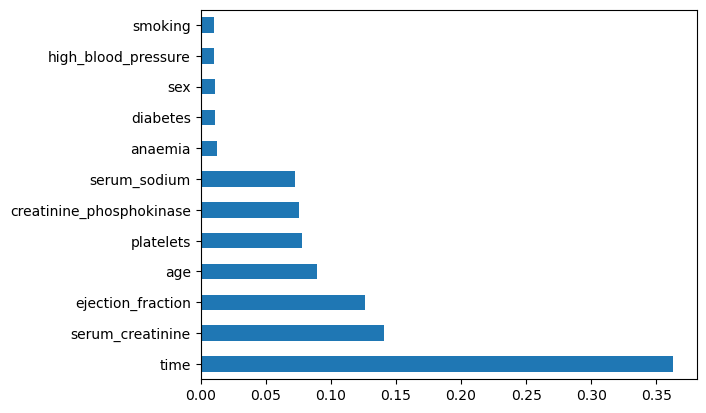

In [28]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

model = RandomForestClassifier()
model.fit(x,y)
##bảng đo độ quan trong của từng cột
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Khi xem xét biểu đồ trên, chúng ta có thể dự đoán rằng các giá trị time, serum_creatinine, ejection_fraction, age sẽ tăng độ chính xác. Nhưng trong bài này sẽ sử dụng hết tất cả các cột 

In [4]:
##xóa các dữ liệu ngoại lai
df=df[df['ejection_fraction']<70]

In [5]:
#inp_data = df.drop(df[['DEATH_EVENT']], axis=1)
#inp_data = df.iloc[:,[0,4,7,11]]
inp_data = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
out_data = df[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=0)

## Applying Transformer
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
## X_train, X_test, y_train, y_test Shape

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (237, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (237, 1)
y_test Shape  :  (60, 1)


In [26]:
## I coded this method for convenience and to avoid writing the same code over and over again

def result(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
    print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
    print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
    print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
    print("\n",classification_report(y_pred, y_test))
    
    plt.figure(figsize=(6,6))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
    plt.title("RandomForestClassifier Ma Trận Nhầm Lẫn (Tỉ lệ %)")
    plt.show()
    
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=False)
    plt.title("RandomForestClassifier Ma Trận Nhầm Lẫn (Số Lượng)")
    plt.show()
    
def sample_result(
    n_estimators=100,
    max_features='auto',
    max_depth=None,
    min_samples_split=2):    
    
    scores = [] 
    for i in range(0,100): # 100 mẫu
        n_estimators, max_features, max_depth, min_samples_split
        X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2)
        clf = RandomForestClassifier(n_estimators= n_estimators,
                                     max_features=max_features,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split) 
        sc=StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
        clf.fit(X_train, y_train)
        scores.append(accuracy_score(clf.predict(X_test), y_test)) 
    
    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

Accuracy Score: 0.9333
Random Forest Classifier f1-score      : 0.8824
Random Forest Classifier precision     : 0.8824
Random Forest Classifier recall        : 0.8824
Random Forest Classifier roc auc score : 0.9179

               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.88      0.88      0.88        17

    accuracy                           0.93        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.93      0.93      0.93        60



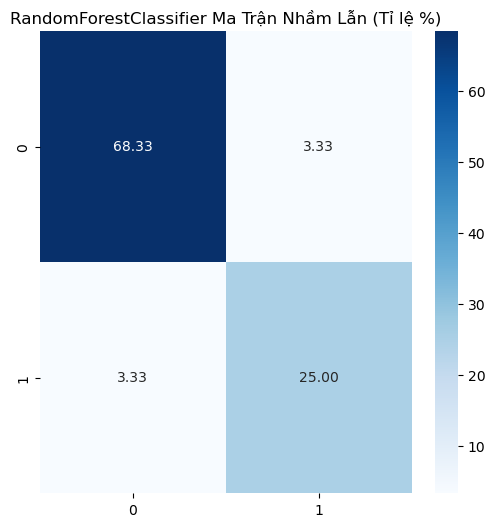

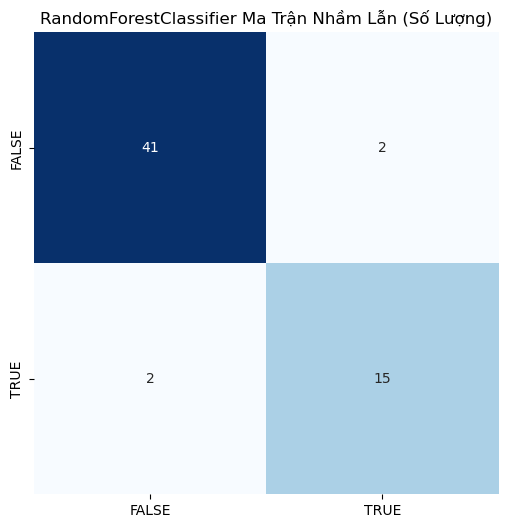

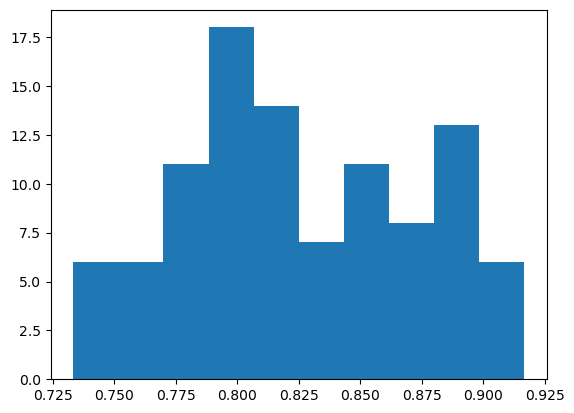

Best Score: 0.9166666666666666
Mean Score: 0.8258333333333332


In [27]:
#Độ chính xác
clf = RandomForestClassifier(random_state=0)
result(clf)
sample_result()

In [9]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
##dự đoán cho 1 giá trị mới 
kq = clf.predict([[70,0, 400,0,50,1,300000,1.0,150,0,1,30]])

In [11]:
kq

array([0], dtype=int64)

In [15]:
y_pred  = clf.predict(X_test)

In [23]:
y_test_new = np.squeeze(y_test)

In [25]:
##so sánh tệp kết quả và tệp máy dự đoán
pd.DataFrame({'Tệp gốc':y_test_new, 'Máy dự đoán' : y_pred})

,Tệp gốc,Máy dự đoán
112,0,1
151,0,0
12,1,1
218,0,0
140,1,0
75,1,1
209,0,0
172,0,0
188,0,0
215,0,0
